In [22]:
import numpy as np
import pandas as pd

In [25]:
dataset = pd.read_csv('/users/he145100/OneDrive - WA Health/Test Data/vw_emergency_episode_250k_feature_importance_only.csv', dtype={
                                                                               'standard_australian_classification_of_countries_2011_for_country_of_birth':'str'})

In [26]:
list(dataset.columns)

['triage_category',
 'primary_diagnosis',
 'presenting_complaint',
 'statistical_area_2_2016',
 'primary_diagnosis_ICD10AM_chapter',
 'principal_diagnosis_system_code_EDIS',
 'standard_australian_classification_of_countries_2011_for_country_of_birth',
 'australian_postcode',
 'attendance',
 'mental_health_attendance',
 'mental_health_attendance_with_length_of_episode_less_than_or_equal_to_4_hours',
 'mental_health_attendance_with_length_of_episode_less_than_or_equal_to_4_hours_denominator',
 'admission',
 'mental_health_admission',
 'seen_within_recommended_time',
 'seen_within_recommended_time_denominator',
 'winter_related_illness_attendance',
 'winter_related_illness_admission',
 'potentially_avoidable_general_practitioner_type_attendance',
 'potentially_avoidable_general_practitioner_type_attendance_denominator',
 'affected_by_both_drugs_and_alcohol',
 'affected_by_alcohol_only',
 'affected_by_drugs_only',
 'affected_by_drugs_and_or_alcohol',
 'likely_meth_related_attendance',
 'se

In [27]:
dataset.shape

(250000, 28)

In [28]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (237500, 28)
Unseen Data For Predictions: (12500, 28)


In [6]:
from pycaret.classification import *

In [53]:
#Ordinal Encoding
#When the categorical features in the dataset contain variables with intrinsic natural order such as Low, Medium, and High, 
#these must be encoded differently than nominal variables (where there is no intrinsic order for e.g. Male or Female). 
#This can be achieved using  the ordinal_features parameter in the setup function that accepts a dictionary with feature 
#names and the levels in the increasing order from lowest to highest.

#triage rating needs to setup as ordinal 
#ordinal_features = {'triage_category' : ['7','5','4','3','2','1']},
admission_test_1 = setup(data = data, target = 'admission',
                         normalize = True,
                         ignore_features=[
                                         'mental_health_admission',
                                            'winter_related_illness_admission'],
                         ordinal_features = {'triage_category' : ['7','5','4','3','2','1']},
                         high_cardinality_features = ['presenting_complaint','australian_postcode',
                                                      'primary_diagnosis','primary_diagnosis_ICD10AM_chapter',
                                                      'principal_diagnosis_system_code_EDIS'], 
                         session_id=123) 

,Description,Value
0,session_id,123
1,Target,admission
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(237500, 28)"
5,Missing Values,True
6,Numeric Features,2
7,Categorical Features,23
8,Ordinal Features,True
9,High Cardinality Features,True


In [54]:
best_model = compare_models(exclude = ['knn', 'qda'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8073,0.8614,0.5031,0.7027,0.5863,0.4652,0.4762,7.8630
xgboost,Extreme Gradient Boosting,0.8053,0.8596,0.5010,0.6967,0.5828,0.4602,0.4709,12.7720
lightgbm,Light Gradient Boosting Machine,0.7984,0.8499,0.4539,0.6982,0.5501,0.4276,0.4441,0.4820
rf,Random Forest Classifier,0.7811,0.8202,0.4576,0.6343,0.5316,0.3936,0.4026,7.8960
gbc,Gradient Boosting Classifier,0.7681,0.8120,0.2975,0.6626,0.4105,0.2913,0.3276,11.4380
et,Extra Trees Classifier,0.7677,0.7952,0.4543,0.5945,0.5150,0.3659,0.3716,12.2920
ada,Ada Boost Classifier,0.7578,0.7888,0.2981,0.6106,0.4006,0.2706,0.2980,4.6760
ridge,Ridge Classifier,0.7434,0.0000,0.1923,0.5837,0.2893,0.1788,0.2200,0.3150
lr,Logistic Regression,0.7433,0.7532,0.2341,0.5663,0.3312,0.2049,0.2356,14.4070
lda,Linear Discriminant Analysis,0.7425,0.7518,0.2462,0.5589,0.3418,0.2107,0.2381,3.1360


In [ ]:
#Test for svm model .9881 precision and catboost .8073 accuracy

In [55]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8054,0.8615,0.4978,0.6989,0.5814,0.4593,0.4705
1,0.8082,0.8628,0.5100,0.7020,0.5908,0.4696,0.4798
2,0.8072,0.8605,0.5009,0.7035,0.5851,0.4641,0.4755
3,0.8066,0.8612,0.5062,0.6983,0.5870,0.4648,0.4751
4,0.8071,0.8612,0.5164,0.6948,0.5925,0.4697,0.4785
5,0.8077,0.8630,0.4969,0.7078,0.5839,0.4638,0.4761
6,0.8075,0.8631,0.4965,0.7074,0.5834,0.4632,0.4755
7,0.8098,0.8580,0.5028,0.7123,0.5895,0.4704,0.4825
8,0.8083,0.8618,0.5081,0.7037,0.5901,0.4692,0.4798


In [56]:
print(catboost)

In [57]:
tuned_catboost = tune_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8054,0.8607,0.5091,0.6926,0.5868,0.4634,0.4728
1,0.8090,0.8620,0.5186,0.7003,0.5959,0.4745,0.4837
2,0.8066,0.8608,0.5109,0.6960,0.5892,0.4666,0.4762
3,0.8063,0.8599,0.5144,0.6931,0.5905,0.4673,0.4762
4,0.8066,0.8608,0.5235,0.6895,0.5951,0.4712,0.4789
5,0.8047,0.8613,0.4991,0.6956,0.5812,0.4583,0.4690
6,0.8090,0.8632,0.5062,0.7070,0.5900,0.4699,0.4810
7,0.8054,0.8574,0.5037,0.6956,0.5843,0.4614,0.4717
8,0.8066,0.8617,0.5150,0.6938,0.5912,0.4681,0.4770


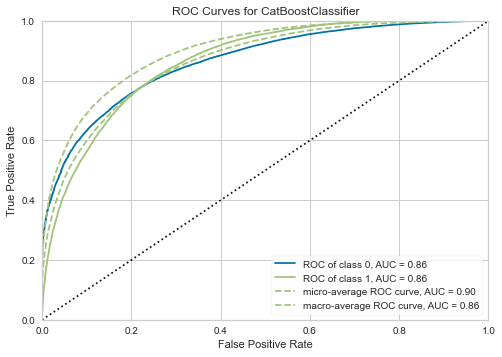

In [58]:
plot_model(tuned_catboost, plot = 'auc')

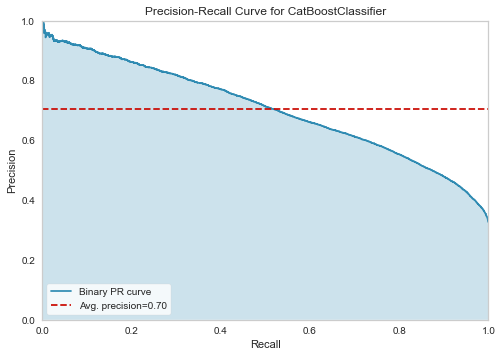

In [59]:
plot_model(tuned_catboost, plot = 'pr')

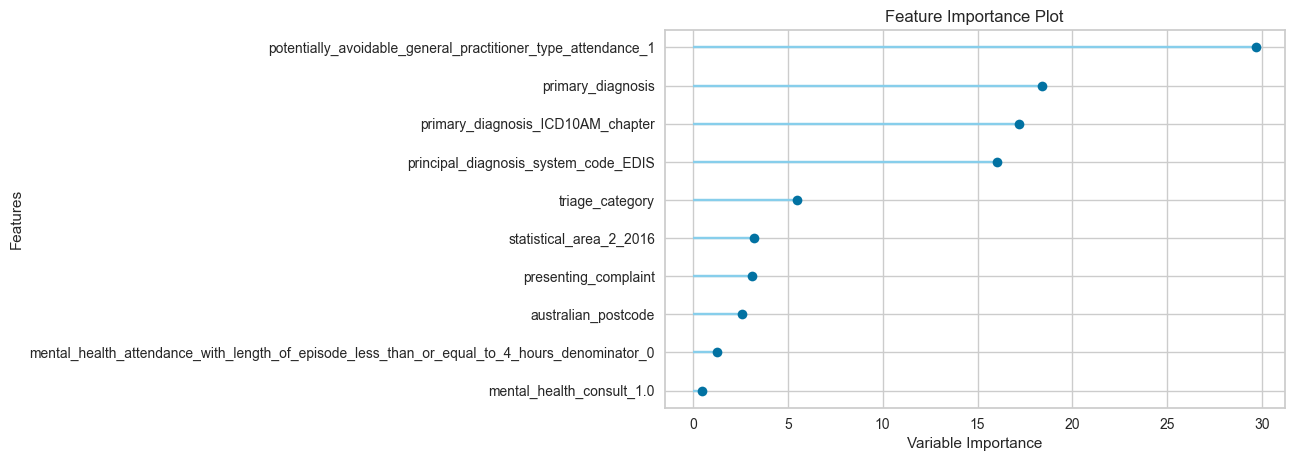

In [60]:
plot_model(tuned_catboost, plot='feature')

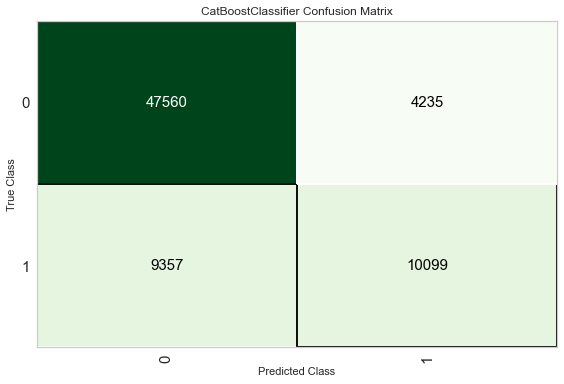

In [62]:
plot_model(tuned_catboost, plot = 'confusion_matrix')
#https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62
#True Positive:
#Interpretation: You predicted positive and it’s true.
#You predicted that a woman is pregnant and she actually is.
#True Negative:
#Interpretation: You predicted negative and it’s true.
#You predicted that a man is not pregnant and he actually is not.
#False Positive: (Type 1 Error)
#Interpretation: You predicted positive and it’s false.
#You predicted that a man is pregnant but he actually is not.
#False Negative: (Type 2 Error)
#Interpretation: You predicted negative and it’s false.
#You predicted that a woman is not pregnant but she actually is.

In [39]:
evaluate_model(tuned_catboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [63]:
predict_model(tuned_catboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8092,0.8645,0.5191,0.7045,0.5978,0.4765,0.4860


,triage_category,primary_diagnosis,presenting_complaint,statistical_area_2_2016,primary_diagnosis_ICD10AM_chapter,principal_diagnosis_system_code_EDIS,australian_postcode,standard_australian_classification_of_countries_2011_for_country_of_birth_0,standard_australian_classification_of_countries_2011_for_country_of_birth_1000,standard_australian_classification_of_countries_2011_for_country_of_birth_1101,...,affected_by_alcohol_only_1,affected_by_drugs_only_1,affected_by_drugs_and_or_alcohol_0,likely_meth_related_attendance_1,self_harm_attendance_0,suicide_attempt_or_at_risk_of_suicide_0,mental_health_consult_1.0,admission,Label,Score
0,2.0,-0.285821,-0.788218,0.005193,1.318648,-0.253454,-0.449593,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0,0.9474
1,2.0,-0.473479,-0.718010,0.019796,1.318648,-0.355041,1.933065,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0,0.9926
2,3.0,-0.472589,0.896141,0.005044,-0.710126,-0.346456,-0.744237,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1,1,0.7230
3,3.0,-0.675366,-0.594984,0.019796,-1.197699,-0.563938,1.933065,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1,0,0.7606
4,2.0,-0.219563,-0.744419,-0.009708,1.318648,-0.480951,-0.880125,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0,0.9979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71246,3.0,-0.571310,-0.752148,0.005044,-0.974386,-0.461874,0.373211,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0,0.7042
71247,4.0,-0.692709,-0.817848,0.019796,-0.710126,-0.584446,1.933065,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0,0.5479
71248,3.0,-0.171537,0.199209,-0.054558,-0.864689,-0.489059,-0.674314,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0,0.8945
71249,2.0,1.252346,0.465872,-0.024757,-0.551204,1.503573,-0.967199,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0,0.9956


In [64]:
final_catboost = finalize_model(tuned_catboost)

In [65]:
#Final catboost parameters for deployment
print(final_catboost)

In [66]:
unseen_predictions = predict_model(final_catboost, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8090,0.8609,0.5363,0.7162,0.6133,0.4900,0.4990


,triage_category,primary_diagnosis,presenting_complaint,statistical_area_2_2016,primary_diagnosis_ICD10AM_chapter,principal_diagnosis_system_code_EDIS,standard_australian_classification_of_countries_2011_for_country_of_birth,australian_postcode,attendance,mental_health_attendance,...,affected_by_both_drugs_and_alcohol,affected_by_alcohol_only,affected_by_drugs_only,affected_by_drugs_and_or_alcohol,likely_meth_related_attendance,self_harm_attendance,suicide_attempt_or_at_risk_of_suicide,mental_health_consult,Label,Score
0,4,M25.53,JUQ00,502011028,(M00-M99) Diseases of the musculoskeletal syst...,D01766,905,6210,1,0,...,0,0,0,0,0,0,0,NaN,0,0.8706
1,3,J05.0,C0000,505021097,(J00-J99) Diseases of respiratory system,D01208,908,6060,0,0,...,0,0,0,0,0,0,0,NaN,0,0.9959
2,4,I80.9,UAPB0,505031103,(I00-I99) Diseases of circulatory system,D01158,902,6065,1,0,...,0,0,0,0,0,0,0,NaN,0,0.9975
3,3,S09.9,JJBB0,505011071,"(S00-T98) Injury, poisoning and certain other ...",D02498,905,6028,1,0,...,0,0,0,0,0,0,0,NaN,0,0.8821
4,4,Z53.9,SRA00,507031174,(Z00-Z99) Factors influencing health status an...,D03309,905,6167,1,0,...,0,0,0,0,0,0,0,NaN,0,0.9979


In [67]:
unseen_predictions[["admission","Label"]].head(50)

,admission,Label
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
5,1,1
6,1,0
7,0,0
8,1,0
9,0,0


In [68]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['admission'], unseen_predictions['Label'], metric = 'Accuracy')

0.809

In [69]:
save_model(final_catboost, 'catboost_admission_01_07_2022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['mental_health_admission',
                                                        'winter_related_illness_admission'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='admission',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill...
                 ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='admission')),
                 ('fix_perfect', Remove_100(target='admission')),
                 ('clean_names', Clean_Co

In [70]:
new_dataset = pd.read_csv('/users/he145100/OneDrive - WA Health/Test Data/emergency_arrivals_powerbi_test_10k.csv', dtype={
                                                                               'standard_australian_classification_of_countries_2011_for_country_of_birth':'str',
  'ambulance_number':'str'})

In [71]:
from pycaret.classification import load_model
saved_catboost = load_model('/Users/he145100/catboost_admission_01_07_2022')
print(saved_catboost)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['mental_health_admission',
                                                       'winter_related_illness_admission'],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='admission',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill...
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='admission')),
                ('fix_perfect', Remove_100(target='admission')),
   

In [72]:
from pycaret.classification import *
new_prediction = predict_model(saved_catboost, data=new_dataset)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8331,0.8849,0.5416,0.7157,0.6166,0.5125,0.5207


In [73]:
new_prediction.head()

,sequence_number,establishment_code,sex,ethnicity,marital_status,interpreter_required,employment_status,occupation,triage_category,visit_type,...,affected_by_drugs_only,affected_by_drugs_and_or_alcohol,likely_meth_related_attendance,self_harm_attendance,suicide_attempt_or_at_risk_of_suicide,mental_health_consult,age,emergency_department_information_system_covid19_flag,Label,Score
0,1101239629,105,1,4,5,2,7.0,NaN,2,1,...,0,0,0,0,0,NaN,64,0,0,0.9892
1,1101239628,208,2,4,1,2,7.0,NaN,2,1,...,0,0,0,0,0,NaN,57,0,0,0.9937
2,1101239627,101,1,4,5,2,3.0,NaN,2,1,...,0,0,0,0,0,NaN,41,0,0,0.9932
3,1101239626,642,2,4,1,2,8.0,NaN,4,1,...,0,0,0,0,0,NaN,18,0,0,0.9993
4,1101239625,277,2,4,1,2,1.0,NaN,3,1,...,0,0,0,0,0,NaN,2,0,0,0.8920


In [74]:
from pycaret.utils import check_metric
check_metric(new_prediction['admission'], new_prediction['Label'], metric = 'Accuracy')

0.8331